In [2]:
%reload_ext autoreload
%autoreload 2

In [3]:

from IPython.display import display, Markdown

import sys
sys.path.append('.')

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D


from util import (
  draw_graphs as _draw_graphs,
  plot_distance_heatmap,
  plot_max_match_results
)
from pipeline import make_pipeline

from mcopt import ot, MorseGraph

In [4]:
pipeline = make_pipeline()

navier_stokes = pipeline.dataset('navier_stokes')

display(Markdown(navier_stokes.display_description()))


# Navier Stokes


TODO
 


In [5]:
graphs = pipeline.graph('navier_stokes').build().frames
nets = pipeline.mm_network('navier_stokes').build().frames
attributes = pipeline.attributes('navier_stokes').build()

> [graph:navier_stokes] config unchanged, loading


> [mmnetwork:navier_stokes] config unchanged, loading


> [attributes:navier_stokes] config unchanged, loading


In [6]:
max_match_pfgw = pipeline.max_match('navier_stokes_max_match_pfgw').build()


> [max_match:navier_stokes_max_match_pfgw] config unchanged, loading


In [7]:
max_match_pfgw.results.shape


(41, 6)

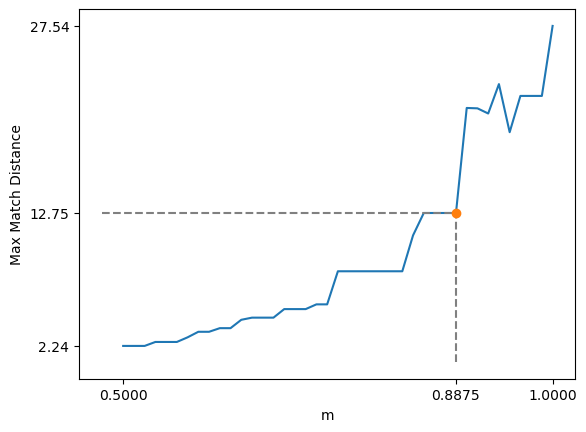

In [8]:
m = 0.8875

fig, ax = plt.subplots()
  
x = max_match_pfgw.ms
y = max_match_pfgw.results[:, 4]

ax.plot(x, y)

ymin, _ = ax.get_ybound()
xmin, _ = ax.get_xbound()

i = np.abs(x - m).argmin()

ax.add_line(Line2D([x[i], x[i]], [ymin, y[i]], color='grey', linestyle='--'))
ax.add_line(Line2D([xmin, x[i]], [y[i], y[i]], color='grey', linestyle='--'))
ax.plot(x[i], y[i], marker='o')

ax.set_xlabel('m', fontsize=10)
ax.set_ylabel('Max Match Distance', fontsize=10)

ax.set_xticks([x.min(), x[i], x.max()])
ax.set_yticks([y.min(), y[i], y.max()])

In [9]:
src_net = nets[1]
dest_net = nets[4]

coupling, _ = ot.pfGW(
  src_net, 
  dest_net, 
  m = m,
  M = attributes.attrs[attributes.index_map[1], attributes.index_map[4]],
)

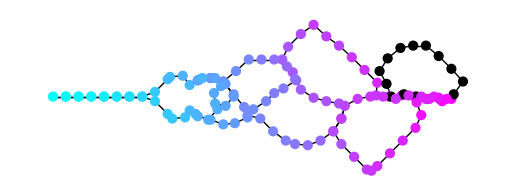

In [10]:

src = graphs[1]
dest = graphs[4]

src_node_color = src.node_color_by_position()

fig, ax = plt.subplots()

dest.draw(
  ax = ax,
  cmap = 'cool',
  node_color = dest.node_color_by_coupling(src_node_color, coupling),
)

fig.savefig('figures/navier_stokes_pfgw_individual.0004.png', dpi=300)

In [11]:
max_match_pw = pipeline.max_match('navier_stokes_max_match_pw').build()

max_match_pw.results.shape

> [max_match:navier_stokes_max_match_pw] config unchanged, loading


(41, 6)

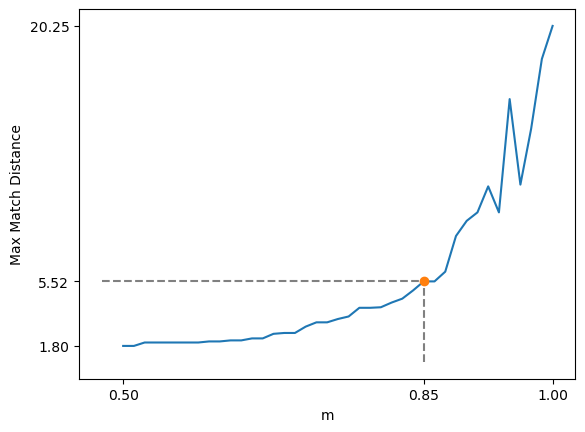

In [12]:
m = 0.85

fig, ax = plt.subplots()
  
x = max_match_pw.ms
y = max_match_pw.results[:, 4]

ax.plot(x, y)

ymin, _ = ax.get_ybound()
xmin, _ = ax.get_xbound()

i = np.abs(x - m).argmin()

ax.add_line(Line2D([x[i], x[i]], [ymin, y[i]], color='grey', linestyle='--'))
ax.add_line(Line2D([xmin, x[i]], [y[i], y[i]], color='grey', linestyle='--'))
ax.plot(x[i], y[i], marker='o')

ax.set_xlabel('m', fontsize=10)
ax.set_ylabel('Max Match Distance', fontsize=10)

ax.set_xticks([x.min(), x[i], x.max()])
ax.set_yticks([y.min(), y[i], y.max()])

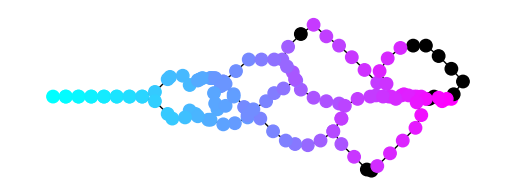

In [13]:
coupling, _ = ot.pWasserstein(
  src_net, 
  dest_net, 
  m = m,
  M = attributes.attrs[attributes.index_map[1], attributes.index_map[4]],
)
src_node_color = src.node_color_by_position()

fig, ax = plt.subplots()

dest.draw(
  ax = ax,
  cmap = 'cool',
  node_size = 80,
  node_color = dest.node_color_by_coupling(src_node_color, coupling),
)

fig.savefig('figures/navier_stokes_pw_individual.0004.png', dpi=300)

In [14]:
m_start = 0.75
m_end = 1
num_ms = 30
  
ms = [m_start + i * (m_end - m_start) / num_ms for i in range(num_ms)] + [m_end]

src_net = nets[1]
dest_net = nets[4]

distances = np.zeros(shape = len(ms))

for i, m in enumerate(ms):
  if np.isclose(m, 1):
    _, d = ot.GW(src_net, dest_net)
  else:
    _, d = ot.pGW(
      src_net, 
      dest_net, 
      m = m,
    )
  
  print(f'm = {m}, d = {d}')
  distances[i] = d

m = 0.75, d = 0.014388880335414597
m = 0.7583333333333333, d = 0.015051327340880561
m = 0.7666666666666667, d = 0.015793966726674005
m = 0.775, d = 0.016634507182925664
m = 0.7833333333333333, d = 0.017417713829045
m = 0.7916666666666666, d = 0.020776624059407507
m = 0.8, d = 0.021755106390844936
m = 0.8083333333333333, d = 0.02273297050833749
m = 0.8166666666666667, d = 0.023531145728881125
m = 0.825, d = 0.02457799871877555
m = 0.8333333333333334, d = 0.025843123177265313
m = 0.8416666666666667, d = 0.026924788504671185
m = 0.85, d = 0.028463613606743127
m = 0.8583333333333334, d = 0.029612332289462705
m = 0.8666666666666667, d = 0.030570662058408322
m = 0.875, d = 0.031622509013400926
m = 0.8833333333333333, d = 0.03274958458334852
m = 0.8916666666666666, d = 0.033886287599216046
m = 0.9, d = 0.04290758511425663
m = 0.9083333333333333, d = 0.03664387406061507
m = 0.9166666666666666, d = 0.035629905760207366
m = 0.925, d = 0.037144101359300255
m = 0.9333333333333333, d = 0.0458884223

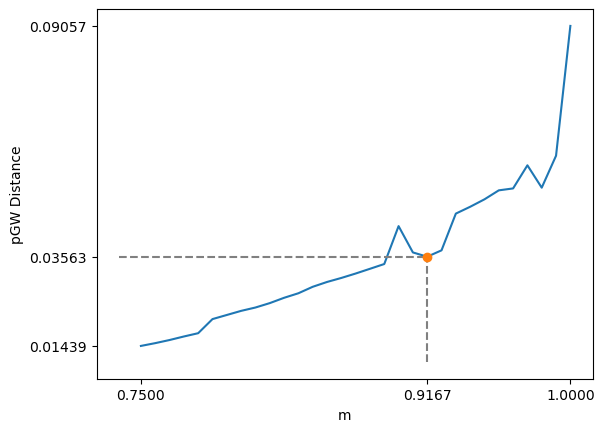

In [15]:
m = 0.9167

fig, ax = plt.subplots()
  
x = np.asarray(ms)
y = distances

ax.plot(x, y)

ymin, _ = ax.get_ybound()
xmin, _ = ax.get_xbound()

i = np.abs(x - m).argmin()

ax.add_line(Line2D([x[i], x[i]], [ymin, y[i]], color='grey', linestyle='--'))
ax.add_line(Line2D([xmin, x[i]], [y[i], y[i]], color='grey', linestyle='--'))
ax.plot(x[i], y[i], marker='o')

ax.set_xlabel('m', fontsize=10)
ax.set_ylabel('pGW Distance', fontsize=10)

ax.set_xticks([x.min(), x[i], x.max()])
ax.set_yticks([y.min(), y[i], y.max()])

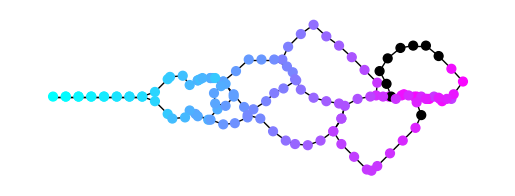

In [16]:
src_net = nets[1]
dest_net = nets[4]

coupling, _ = ot.pGW(
  src_net, 
  dest_net, 
  m = m,
)

src = graphs[1]
dest = graphs[4]

src_node_color = src.node_color_by_position()

fig, ax = plt.subplots()

dest.draw(
  ax = ax,
  cmap = 'cool',
  node_color = dest.node_color_by_coupling(src_node_color, coupling),
)

fig.savefig('figures/navier_stokes_pgw_individual.0004.png', dpi=300)